# EDA

In [23]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
import pybingmaps
bing = pybingmaps.Bing('AizoCiuRwxjT9SjxftwCItVoRXI2v0V3UnLTKSebigC5GUW5NklrIZpL5jRANFuJ')

In [31]:
#Inicializacion de variables de tu posicion
my_latitude =20.677041
my_longuitud =-103.347745
my_location = (my_latitude, my_longuitud)
np_my_location_arr = np.array([my_latitude,my_longuitud])
df_my_location = pd.DataFrame({'Latitud': [my_latitude],'Longuitud': [my_longuitud]})
#np_my_location_arr

In [2]:
#Importando los datos y convirtiendolo en un dataframe
df_Hospitals = pd.read_excel("./Master_Dataset_AI_Saturday.xlsx")
#print(df_Hospitals)

In [3]:
#Verificar cuantos datos hay nulos
#coordinates_df.isnull().sum()

In [4]:
#Informacion General del dataframe
#df_Hospitals.describe()

<Figure size 3600x0 with 0 Axes>

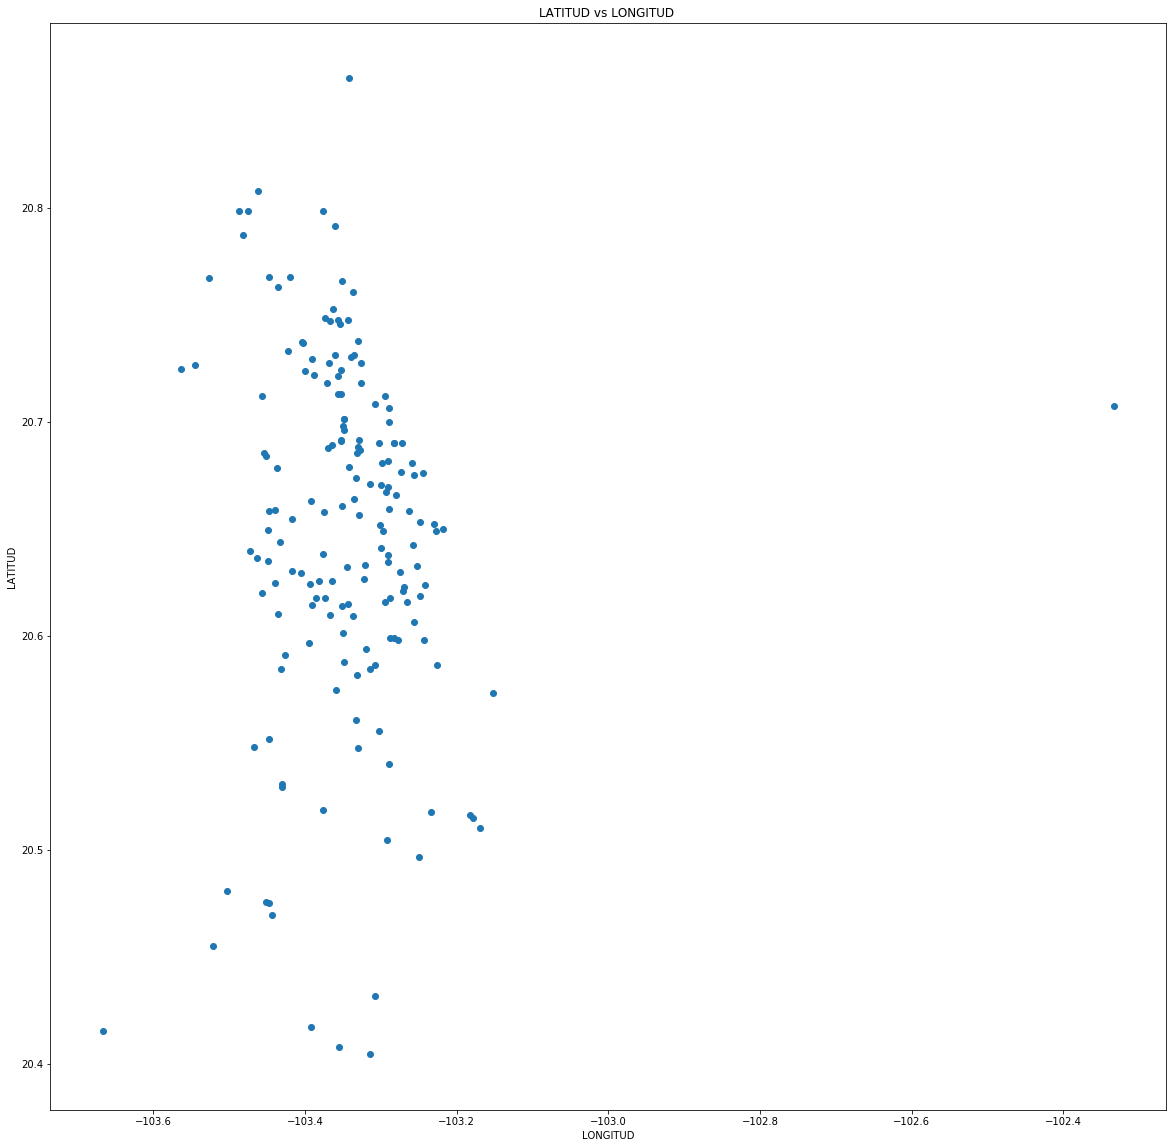

<Figure size 3600x0 with 0 Axes>

In [5]:
#Creando el plot
fig, ax = plt.subplots(figsize=(20, 20))
#Graficando Longitud es X axis axis en un mapa, Latitud es Y axis en un mapa y 
ax.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'])
#Configurando los titulos y etiquetas
ax.set_title('LATITUD vs LONGITUD ')
ax.set_xlabel('LONGITUD')
ax.set_ylabel('LATITUD')
plt.figure(figsize=(50,0))

# Implementacion Algoritmo Kmeans

In [74]:
#Juntando los datos de las localizaciones del hospital que nutren al algoritmo de Kmeans
df_LatitudHospitals = pd.DataFrame(df_Hospitals['LATITUD'])
df_LongitudHospitals = pd.DataFrame(df_Hospitals['LONGITUD'])
df_coordenadasHospitals = df_Latitud.join(df_LongitudHospitals)
#print(df_coordenadas)

In [7]:
# La documentacion de Kmeans se puede encontrar en: 
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [77]:
#Se ejecutara 2 veces, la primera vez el algoritmo para conseguir los centros y la segunda vez para incluir la posicion
#en la que nos encontramos como un centro
k_means1 = KMeans(init='k-means++', n_clusters=10, n_init=10)
t0 = time.time()
k_means1.fit(df_coordenadasHospitals)
y_kmeans1 = k_means1.predict(df_coordenadasHospitals)
t_batch = time.time() - t0
centers = k_means1.cluster_centers_
print(centers)

[[  20.63653285 -103.42343301]
 [  20.63547477 -103.26569829]
 [  20.70747016 -102.3337922 ]
 [  20.74510941 -103.36695089]
 [  20.59120667 -103.33713792]
 [  20.49306025 -103.48094075]
 [  20.41523379 -103.34197982]
 [  20.76540133 -103.48801712]
 [  20.51903443 -103.20836731]
 [  20.68833614 -103.3210839 ]]


In [79]:
newcenters = np.insert(centers, 0, np_my_location_arr, axis=0)

In [81]:
#https://stackoverflow.com/questions/28862334/k-means-with-selected-initial-centers
#https://stackoverflow.com/questions/38355153/initial-centroids-for-scikit-learn-kmeans-clustering
k_means2 = KMeans(init=newcenters, n_clusters=11, n_init=1)
t0 = time.time()
k_means2.fit(df_coordenadasHospitals)
y_kmeans2 = k_means2.predict(df_coordenadasHospitals)
t_batch = time.time() - t0

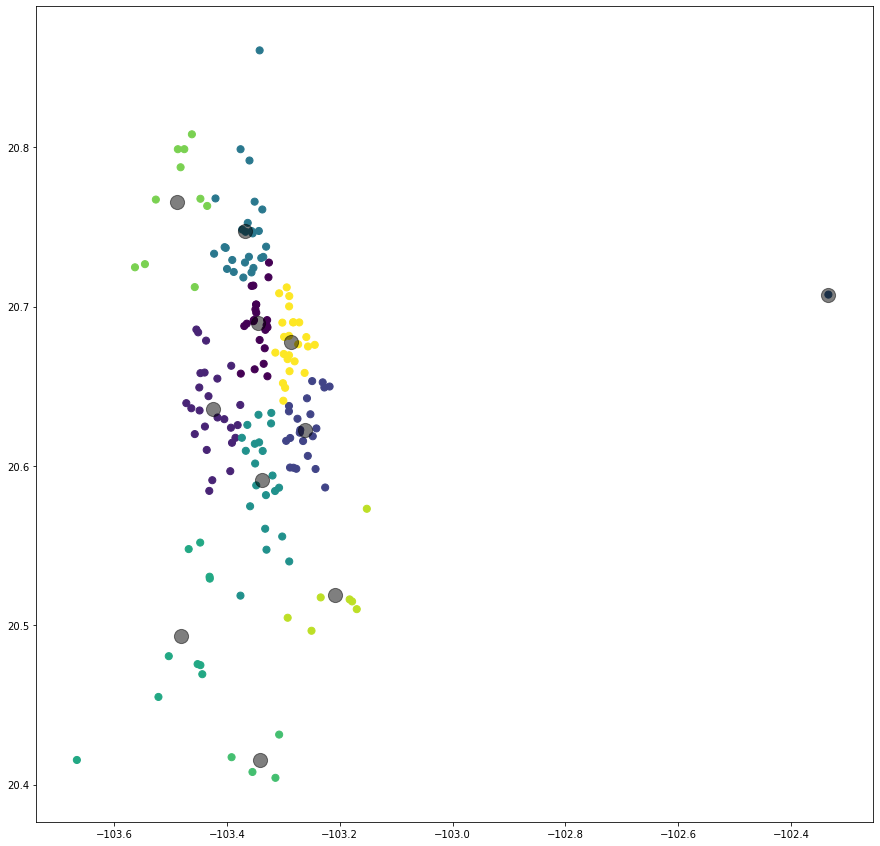

In [82]:
plt.subplots(figsize=(15, 15))
plt.scatter(df_Hospitals['LONGITUD'], df_Hospitals['LATITUD'], c=y_kmeans2, s=50, cmap='viridis')
centers = k_means2.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5);

In [83]:
df_Outputs_KMeans = pd.DataFrame(df_Hospitals['NOMBRE DE LA UNIDAD'])
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(df_Hospitals['LATITUD']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(df_Hospitals['LONGITUD']))
df_Outputs_KMeans = df_Outputs_KMeans.join(pd.DataFrame(data=y_kmeans2, columns=["Center_Index"]))

In [84]:
closest_cluster_center = k_means2.predict(df_my_location)

In [85]:
LocateCenters = df_Outputs_KMeans.loc[df_Outputs_KMeans["Center_Index"] == closest_cluster_center[0]] 
LocateCenters = LocateCenters.reset_index()
LocateCenters = LocateCenters.drop(['index'], axis=1)
LocateCenters = LocateCenters.drop(['Center_Index'], axis=1)
LocateCenters

,NOMBRE DE LA UNIDAD,LATITUD,LONGITUD
0,BCO. SANGRE OBLATOS,20.686922,-103.328075
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,20.713143,-103.353109
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,20.701248,-103.348062
3,CENTRO DE SALUD GUADALAJARA 3,20.690800,-103.353000
4,CENTRO DE SALUD LOMAS DEL PARAISO,20.727562,-103.325502
5,CENTRO DE SALUD N°1,20.673800,-103.333000
6,CENTRO DE SALUD RANCHO NUEVO,20.718345,-103.326352
7,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,20.696100,-103.348000
8,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,20.701250,-103.348274
9,DR. ARTURO GLEZ. GUADALAJARA # 1,20.688324,-103.329705


In [86]:
for i in LocateCenters.index:
    hospital_location = (LocateCenters.iat[i,1], LocateCenters.iat[i,2])
    LocateCenters.at[i, 'Tiempo_Estimado(seg)'] = bing.travelTime(my_location, hospital_location )
    LocateCenters.at[i, 'Distancia_Estimada(km)'] = bing.travelDistance(my_location, hospital_location)

In [87]:
print(my_location)

(20.677041, -103.347745)


In [88]:
LocateCenters

,NOMBRE DE LA UNIDAD,LATITUD,LONGITUD,Tiempo_Estimado(seg),Distancia_Estimada(km)
0,BCO. SANGRE OBLATOS,20.686922,-103.328075,695.0,2.912
1,CENTRO DE ATENCIÓN PRIMARIA EN ADICCIONES GUAD...,20.713143,-103.353109,860.0,4.770
2,CENTRO DE REHABILITACIÓN INTEGRAL DIF JALISCO,20.701248,-103.348062,640.0,3.306
3,CENTRO DE SALUD GUADALAJARA 3,20.690800,-103.353000,453.0,2.067
4,CENTRO DE SALUD LOMAS DEL PARAISO,20.727562,-103.325502,1275.0,8.243
5,CENTRO DE SALUD N°1,20.673800,-103.333000,471.0,2.286
6,CENTRO DE SALUD RANCHO NUEVO,20.718345,-103.326352,1136.0,8.106
7,CENTRO DENTAL INFANTIL DE ESPECIALIDADES,20.696100,-103.348000,470.0,2.185
8,CENTRO REGIONAL DE DESARROLLO INFANTIL Y ESTIM...,20.701250,-103.348274,579.0,2.750
9,DR. ARTURO GLEZ. GUADALAJARA # 1,20.688324,-103.329705,701.0,2.940
